# H03 - Pump failure data

# _Josep Fortiana_ $\mskip100mu$  2023-05-15

***
###### LaTeX macros
$\def\argmax{\operatorname{arg\,max}}$
$\def\argmin{\operatorname{arg\,min}}$
$\def\binomdist{\operatorname{Binomial}}$
$\def\berndist{\operatorname{Bernoulli}}$
$\def\betabinomdist{\operatorname{Beta-Binomial}}$
$\def\betadist{\operatorname{Beta}}$
$\def\betahat{\kern1.3pt\hat{\kern-1.3pt \beta}}$
$\def\borel{\operatorname{Borel}}$
$\def\cauchydist{\operatorname{Cauchy}}$
$\def\CondTo{\mathbin{|\mskip0.5mu}}$
$\def\cov{\operatorname{cov}}$
$\def\cor{\operatorname{cor}}$
$\def\dexpdist{\operatorname{DExp}}$
$\def\eqdef{\stackrel{\text{def}}{\mskip3mu=\mskip3mu}}$
$\def\cE{\cal E}$
$\def\Ee{\operatorname{E}}$
$\def\expdist{\operatorname{Exponential}}$
$\def\fdist{\operatorname{F}}$
$\def\gammadist{\operatorname{Gamma}}$
$\def\geomdist{\operatorname{Geom}}$
$\def\halfcauchydist{\operatorname{Cauchy}^{+}}$
$\def\hyperdist{\operatorname{Hypergeom}}$
$\def\hypergeomdist{\operatorname{Hypergeom}}$
$\def\indep{\perp{\mskip-16mu}\perp}$
$\DeclareMathOperator{\indica}{\mathbb{1}}$
$\DeclareMathOperator{\invgammadist}{InvGamma}$
$\def\laplacedist{\operatorname{Laplace}}$
$\def\lognormaldist{\operatorname{Log-Normal}}$
$\DeclareMathOperator{\multinomialdist}{Multinomial}$
$\DeclareMathOperator{\multinomdist}{Multinomial}$
$\def\N{\mathbb{N}}$
$\def\negbindist{\operatorname{NegativeBinomial}}$
$\def\normaldist{\operatorname{Normal}}$
$\def\cP{\cal P}$
$\def\poissondist{\operatorname{Poisson}}$
$\def\prob{P}$
$\def\R{\mathbb{R}}$ 
$\def\stilde{\tilde{s}}$ 
$\def\sqtilde{\tilde{s}{}^{2}}$ 
$\def\tdist{\operatorname{t}}$
$\def\unifdist{\operatorname{Unif}}$
$\def\va{\text{v.a.}}$
$\def\var{\operatorname{var}}$
$\def\Var{\operatorname{Var}}$
$\def\xbar{\kern1.3pt\overline{\kern-1.3pt x}}$
$\def\Xbar{\kern1.3pt\overline{\kern-1.3pt X}}$
$\def\yhat{\kern1.3pt\hat{\kern-1.3pt y}}$
$\def\Z{\mathbb{Z}}$
***

In [3]:
#install.packages("bayesplot",dependencies=TRUE,repos="https://cloud.r-project.org")
require(bayesplot,quietly=TRUE)

This is bayesplot version 1.10.0

- Online documentation and vignettes at mc-stan.org/bayesplot

- bayesplot theme set to bayesplot::theme_default()

   * Does _not_ affect other ggplot2 plots

   * See ?bayesplot_theme_set for details on theme setting



# The pump failure dataset

Source: Gaver, D. P. & O'Muircheartaigh, I G. (1987). _Robust empirical Bayes analysis of event rates._ Technometrics 29, No. 1, pp. 1-15.

This is a very classical example in Bayesian modelling. It demonstrates hierarchical models and the need thereof.

Robert, Casella (2010), _Introducing Monte Carlo Methods with R,_ Chapter 7, Example 7.12: Gibbs sampling in the Pump failure dataset, pag. 222ff.

Number of failures observed and times of observation of ten pumps in a nuclear plant, with the data given in the following table:
	
$$
\begin{array}{l|cccccccccc}
	\hline
	\text{Pump}    &1		&2		&3		&4		&5		&6		&7		&8		&9		&10\\[0.25cm]
	\hline
	\text{Failures}&5		&1		&5		&14		&3		&19		&1		&1		&4		&22\\[0.25cm]
	\text{Time} &94.320 &15.720  &62.880  &125.760  &5.240  &31.440  &1.048 &1.048  &2.096 &10.480\\[0.25cm]
	\hline
\end{array}
$$



#### Data

In [4]:
x<-c(5, 1, 5, 14, 3, 19, 1, 1, 4, 22)
t<-c(94.320, 15.720, 62.880, 125.760, 5.240, 31.440, 1.048, 1.048, 2.096, 10.480)
n<-length(x)

# Frequentist treatment

Model assumes the number of failures of the $i$-th pump follows a Poisson process with parameter $\lambda_{i}$, $(1\leq i\leq n)$, $n=10$.

For an observation time $t_{i}$, the number of failures $X_{i}$ is thus a r.v.:

$$
    X_{i}\sim\operatorname{Poisson}(\lambda_{i}\cdot t_{i}),\mskip40mu 1\leq i\leq n.
$$



Either each pump has a different $\lambda_{i}$ parameter, $1\leq i\leq n=10$,

In [5]:
# Either each lambda.i is ML-estimated from a single observation as x.i/t.i
Individual.lambda.ML<-x/t
round(Individual.lambda.ML,3)

[1] 0.053 0.064 0.080 0.111 0.573 0.604 0.954 0.954 1.908 2.099

Or all pumps share the same $\lambda$ parameter, estimated as the average $\bar\lambda$ of the $n=10$ $\lambda_{i}$ values, $1\leq i\leq n$.

In [6]:
# or a common lambda is ML-estimated as the average of the above
mean.lambda.ML<-mean(Individual.lambda.ML)
round(mean.lambda.ML,3)

[1] 0.74

# Empirical Bayes

The **empirical Bayes** approach is to consider the $\lambda_{i}$ parameters as samples from a common _prior_ distribution.

This distribution is assumed to be a $\gammadist(\alpha,\beta)$.

These parameters $\alpha$ and $\beta$ are obtained from the observed data (hence the **empirical** name).

Using the conjugate Gamma prior pdf for the Poisson likelihood, we get the model:

$$
    \begin{array}{clll}
        X_{i}      &\sim&\operatorname{Poisson}(\lambda_{i}\cdot t_{i}), &i=1,\dots,n,\\[0.35cm]
        \lambda_{i}&\sim&\operatorname{Gamma}(\alpha,\beta),              &i=1,\dots,n,
    \end{array}
$$

$\alpha$, $\beta$ are derived from the "observed" set of ML $\lambda$ estimates as follows:

A Gamma distribution with parameters $\alpha$ and $\beta$ has expectation and variance:

$$
    \mu=\dfrac{\alpha}{\beta},\mskip50mu \sigma^2=\dfrac{\alpha}{\beta^2}.
$$

Given $\mu$ and $\sigma^2$, we obtain:

$$
    \alpha=\dfrac{\mu^{2}}{\sigma^{2}},\mskip50mu \beta=\dfrac{\mu}{\sigma^{2}},
$$

then $\mu$ is estimated by the empirical mean $\xbar$ and $\sigma^{2}$ by the empirical variance $\sqtilde$.

The **empirical Bayes** procedure is to _"estimate"_ parameters in prior pdf's from data, either by ML or by the method of moments.

In [7]:
# We try the two possible candidates, corrected and uncorrected variance
var.tilde.lambda.ML<-var(Individual.lambda.ML)        # Corrected variance of "observed" lambdas 
writeLines(sprintf("Corrected   variance of the 'observed' lambdas = %4.3f",round(var.tilde.lambda.ML,3)))
var.lambda.ML=(n-1)*var.tilde.lambda.ML/n             # Uncorrected variance of "observed" lambdas 
writeLines(sprintf("Uncorrected variance of the 'observed' lambdas = %4.3f",round(var.lambda.ML,3)))

Corrected   variance of the 'observed' lambdas = 0.568
Uncorrected variance of the 'observed' lambdas = 0.511


Here, we estimate $\alpha$ and $\beta$ in the prior $\operatorname{Gamma}(\alpha,\beta)$ from the empirical mean and variance of the $\lambda$'s.

In [8]:
alpha.tilde.hat<-(mean.lambda.ML)^2/var.tilde.lambda.ML
beta.tilde.hat<-mean.lambda.ML/var.tilde.lambda.ML
alpha.hat<-(mean.lambda.ML)^2/var.lambda.ML
beta.hat<-mean.lambda.ML/var.lambda.ML
c(round(alpha.tilde.hat,3),round(beta.tilde.hat,3))
c(round(alpha.hat,3),round(beta.hat,3))

[1] 0.964 1.303

[1] 1.071 1.448

## Posterior pdf with the empirical Bayes approach

Each $i$-th pump has a posterior pdf for $\lambda_{i}$, given its $t_{i}$ and the observed $x_{i}$.

From the conjugate models formula:

$$
    \lambda_{i}\,|\,x_{i}\sim\operatorname{Gamma}(\widehat{\alpha}+x_{i},\widehat{\beta}+t_{i}).
$$

In [9]:
Empirical.alpha.post<-alpha.hat+x
Empirical.beta.post<-beta.hat+t
rbind(round(Empirical.alpha.post,3),round(Empirical.beta.post,3))

6.071,2.071,6.071,15.071,4.071,20.071,2.071,2.071,5.071,23.071
95.768,17.168,64.328,127.208,6.688,32.888,2.496,2.496,3.544,11.928


### Posterior expectations

In [10]:
Empirical.lambda.post.mean<-Empirical.alpha.post/Empirical.beta.post
str(Empirical.lambda.post.mean)
round(Empirical.lambda.post.mean,3)

 num [1:10] 0.0634 0.1207 0.0944 0.1185 0.6088 ...


[1] 0.063 0.121 0.094 0.118 0.609 0.610 0.830 0.830 1.431 1.934

### Posterior 90% credible intervals

In [11]:
round(rbind(qgamma(0.05,shape=Empirical.alpha.post,rate=Empirical.beta.post),qgamma(0.95,shape=Empirical.alpha.post,rate=Empirical.beta.post)),3)

0.028,0.022,0.041,0.073,0.211,0.405,0.154,0.154,0.569,1.323
0.111,0.283,0.165,0.173,1.175,0.850,1.947,1.947,2.611,2.641


### Posterior MAP estimates

Using that the mode of a Gamma distribution is $(\alpha-1)/\beta$

In [12]:
Empirical.lambda.post.MAP<-(Empirical.alpha.post-1)/Empirical.beta.post
round(Empirical.lambda.post.MAP,3)

[1] 0.053 0.062 0.079 0.111 0.459 0.580 0.429 0.429 1.149 1.850

## Full Bayesian hierarchical treatment

The modeling is based on the assumption that the number of failures of the $i$-th pump follows a Poisson process with parameter $\lambda_{i}$, $(1\leq i\leq 10)$.

For an observation time $t_{i}$, the number of failures $X_{i}$ is thus a $\poissondist(\lambda_{i}\cdot t_{i})$ random variable.

Each $\lambda_{i}$ is considered as a sample from a common $\gammadist(\alpha,\beta)$.

In turn, $\beta$ is given a _hyperprior_ distribution $\gammadist(\gamma,\delta)$.

$\alpha$, $\gamma$ and $\delta$ take constant values to be decided.  

Robert, Casella (2010) use $\alpha=1.8$, $\gamma=0.1$ and $\delta=1.0$ or $\delta=100.0$.

Thus we have a hierarchical model:

$$
    \begin{array}{clll}
    X_{i} &\sim&\poissondist(\lambda_{i}\cdot t_{i}),   \mskip50mu     &i=1,\dots,10,\\[0.35cm]
    \lambda_{i} &\sim&\gammadist(\alpha,\beta),              &i=1,\dots,10,\\[0.35cm]
    \beta &\sim&\gammadist(\gamma,\delta).
    \end{array}
$$

In the original paper where this data were first analyzed with a full Bayesian model:

Edward I. George, U. E. Makov and A. F. M. Smith (1993), _"Conjugate Likelihood Distributions"_   
Scandinavian Journal of Statistics, Vol. 20, No. 2 (1993), 147-156,

They use an exponential prior for $\alpha$, instead of a constant value:

$$
    \begin{array}{cll}
    \alpha &\sim&\operatorname{Exp}(\omega),
    \end{array}
$$

with parameter either $\omega=1.0$ or $\omega=1/100$.

**Note:** in the paper _Reader Reaction: A Re-Analysis of the Pump-Failure Data (with Response),_ by
J. A. Nelder, E. I. George, U. E. Makov and A. F. M. Smith,   
Scandinavian Journal of Statistics, Vol. 21, No. 2 (Jun., 1994), pp. 187-191,   
they notice that pumps 1, 3, 4, and 6 were operated continuously,   
whereas the remaining ones were operated intermittently. 

Then they show that an improved fit is obtained when this difference is taken into account.

# Using JAGS 

In [13]:
#install.packages("R2jags", dependencies=TRUE, repos= "https://cloud.r-project.org")
require(R2jags)

Loading required package: R2jags

Loading required package: rjags

Loading required package: coda

Linked to JAGS 4.3.1

Loaded modules: basemod,bugs


Attaching package: 'R2jags'


The following object is masked from 'package:coda':

    traceplot




## Data 

In [14]:
x<-c(5, 1, 5, 14, 3, 19, 1, 1, 4, 22)
t<-c(94.320, 15.720, 62.880, 125.760, 5.240, 31.440, 1.048, 1.048, 2.096, 10.480)
n<-length(x)

In [15]:
pumps.JAGS.01.data<-list(n=n,t=t,x=x)

### Model 1 ($\alpha\sim\expdist(1)$)

In [16]:
pumps.JAGS.01.model<-"model{
    for (i in 1:n) {
        lambda[i] ~ dgamma(alpha, beta)
        theta[i] <- lambda[i] * t[i]
        x[i] ~ dpois(theta[i])
        }
    alpha ~ dexp(1)
    beta ~ dgamma(0.1, 1.0)
    }"

cat(pumps.JAGS.01.model,file="pumps.JAGS.01.jag")

### Inits

In [17]:
pumps.JAGS.01.inits<-list(alpha = 1, beta = 1)

### Run JAGS

In [18]:
pumps.JAGS.01.samples<-jags(data=pumps.JAGS.01.data,n.chains=3,parameters.to.save=c("alpha", "beta","lambda"), 
        model.file="pumps.JAGS.01.jag",n.iter=15000,n.burnin=5000)

module glm loaded



Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 10
   Unobserved stochastic nodes: 12
   Total graph size: 45

Initializing model



In [19]:
pumps.JAGS.01.mcmc<-as.mcmc(pumps.JAGS.01.samples)
summary(pumps.JAGS.01.mcmc)


Iterations = 5001:14991
Thinning interval = 10 
Number of chains = 3 
Sample size per chain = 1000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

               Mean      SD  Naive SE Time-series SE
alpha       0.69666 0.26416 0.0048228      0.0049384
beta        0.93011 0.53318 0.0097345      0.0101515
deviance   42.76556 4.13646 0.0755211      0.0781753
lambda[1]   0.05966 0.02411 0.0004401      0.0004402
lambda[10]  1.98983 0.42712 0.0077981      0.0077321
lambda[2]   0.10058 0.07768 0.0014181      0.0014185
lambda[3]   0.08875 0.03825 0.0006984      0.0006984
lambda[4]   0.11631 0.03055 0.0005577      0.0005534
lambda[5]   0.60467 0.31841 0.0058133      0.0059225
lambda[6]   0.61195 0.13834 0.0025257      0.0025257
lambda[7]   0.86994 0.73264 0.0133762      0.0133349
lambda[8]   0.90524 0.71801 0.0131091      0.0133412
lambda[9]   1.60619 0.79760 0.0145622      0.0145589

2. Quantiles for each variable:

                2.5%     

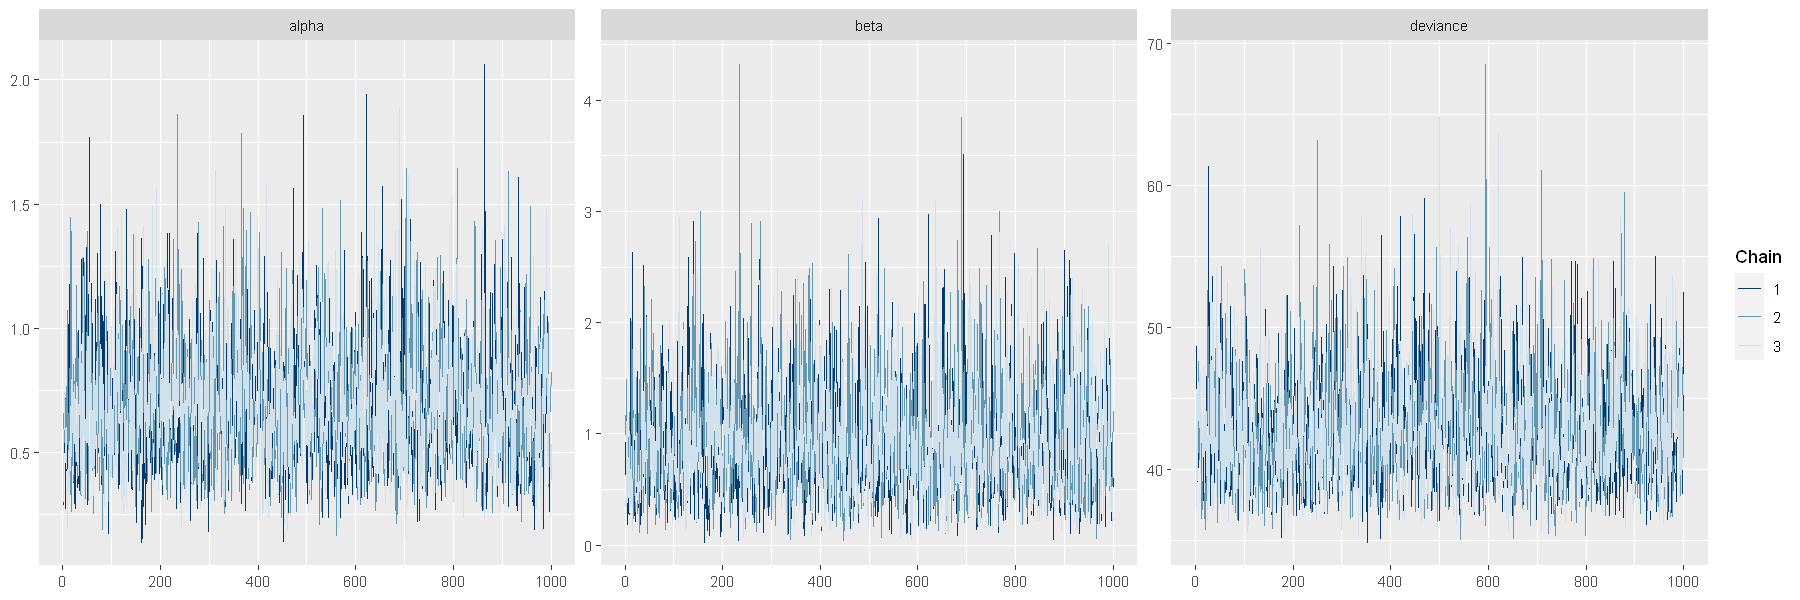

In [20]:
options(repr.plot.width=15,repr.plot.height=5)
mcmc_trace(pumps.JAGS.01.mcmc,pars=c("alpha","beta","deviance"))

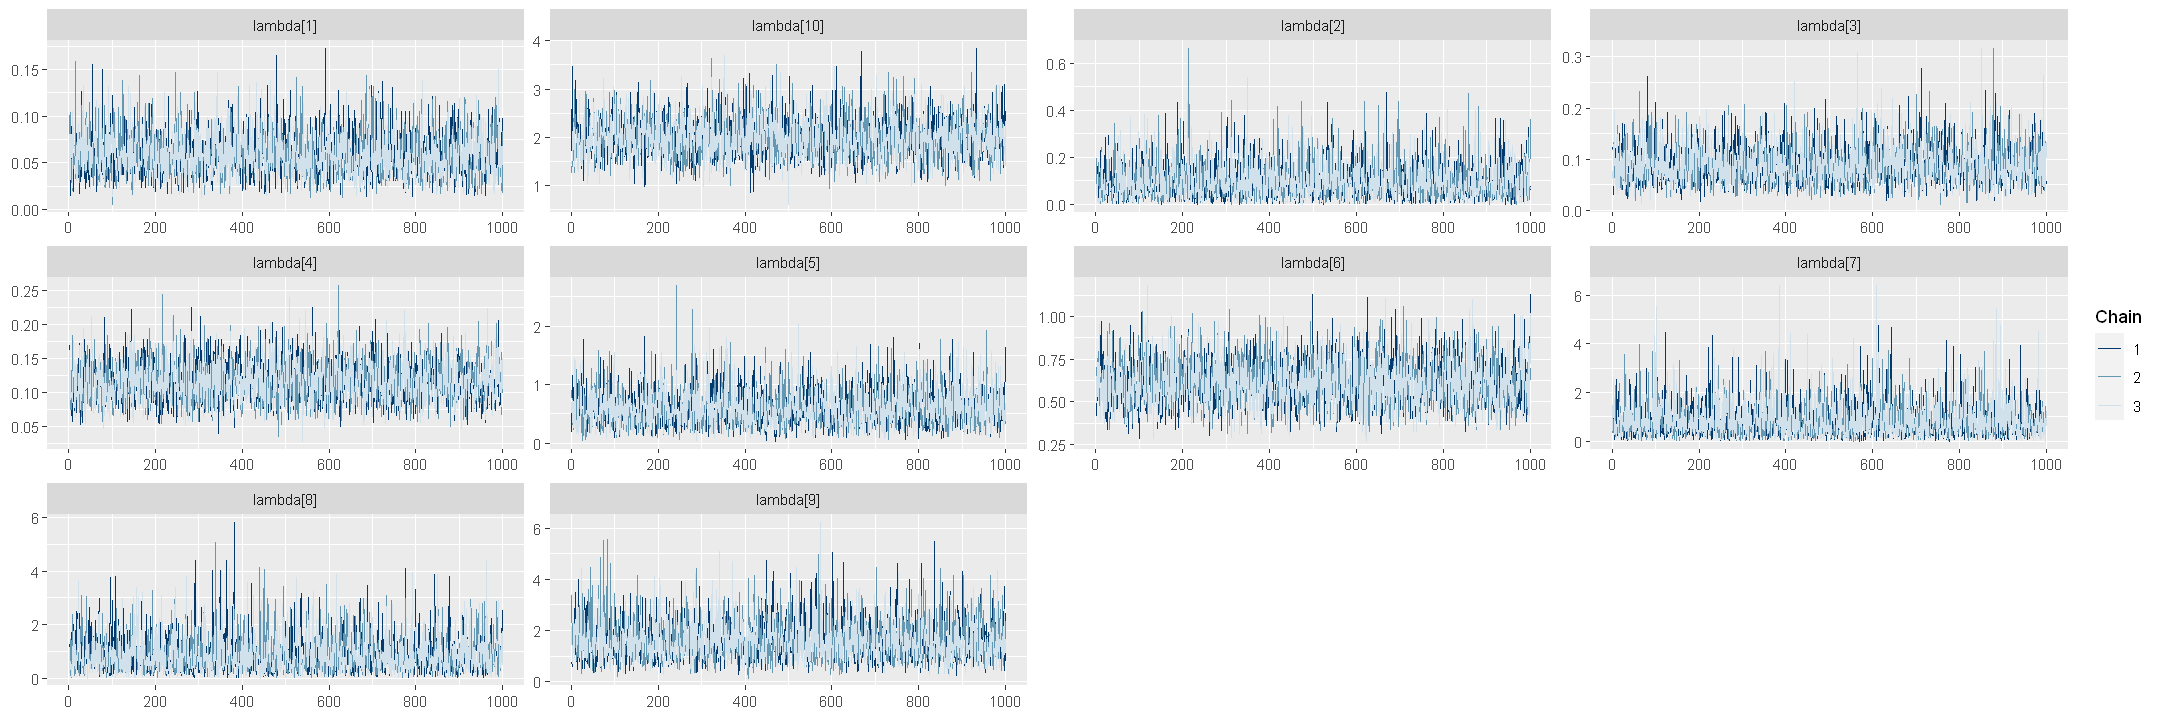

In [21]:
options(repr.plot.width=18,repr.plot.height=6)
mcmc_trace(pumps.JAGS.01.mcmc,pars=vars(contains("lambda")))

Warning message:
"The `facets` argument of `facet_grid()` is deprecated as of ggplot2 2.2.0.
ℹ Please use the `rows` argument instead.
ℹ The deprecated feature was likely used in the bayesplot package.
  Please report the issue at <https://github.com/stan-dev/bayesplot/issues/>."


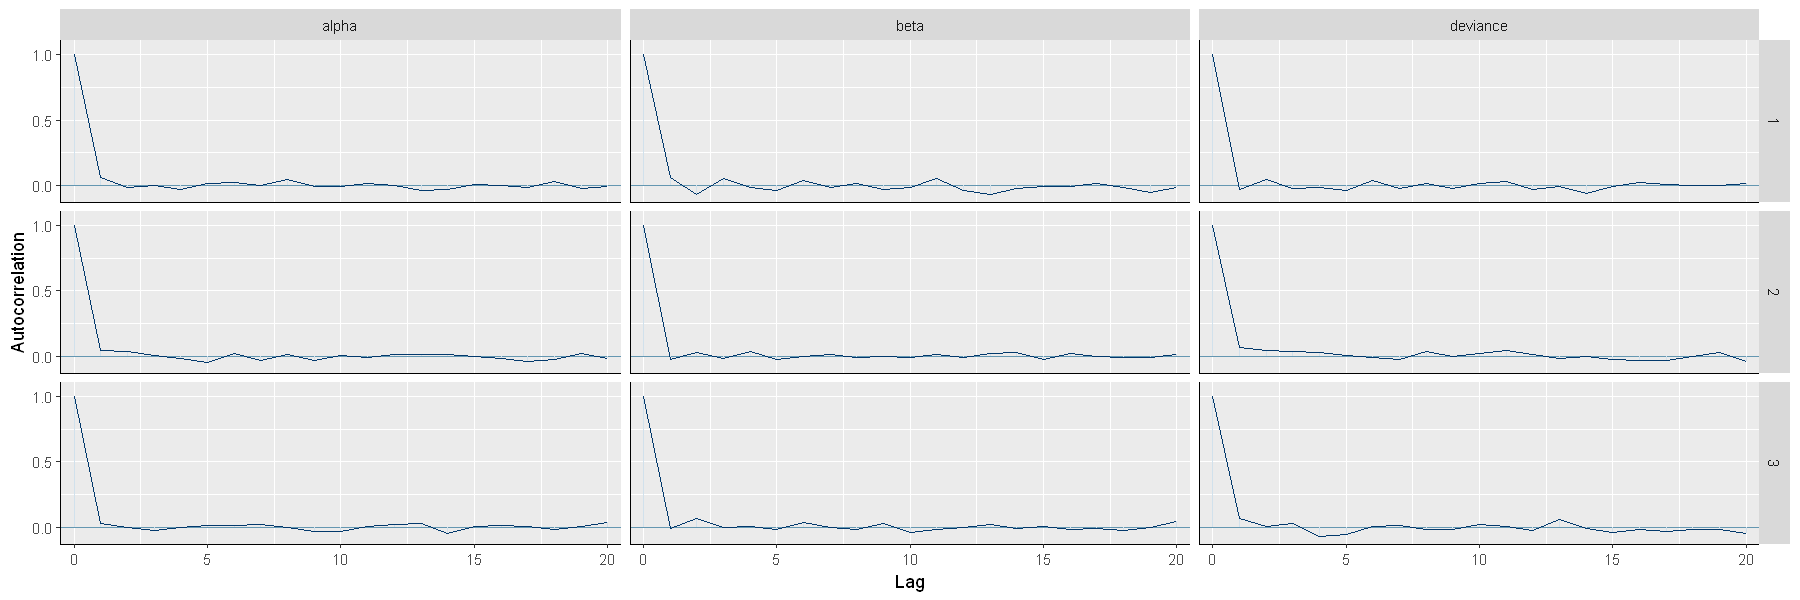

In [22]:
options(repr.plot.width=15,repr.plot.height=5)
mcmc_acf(pumps.JAGS.01.mcmc,pars=c("alpha","beta","deviance"))

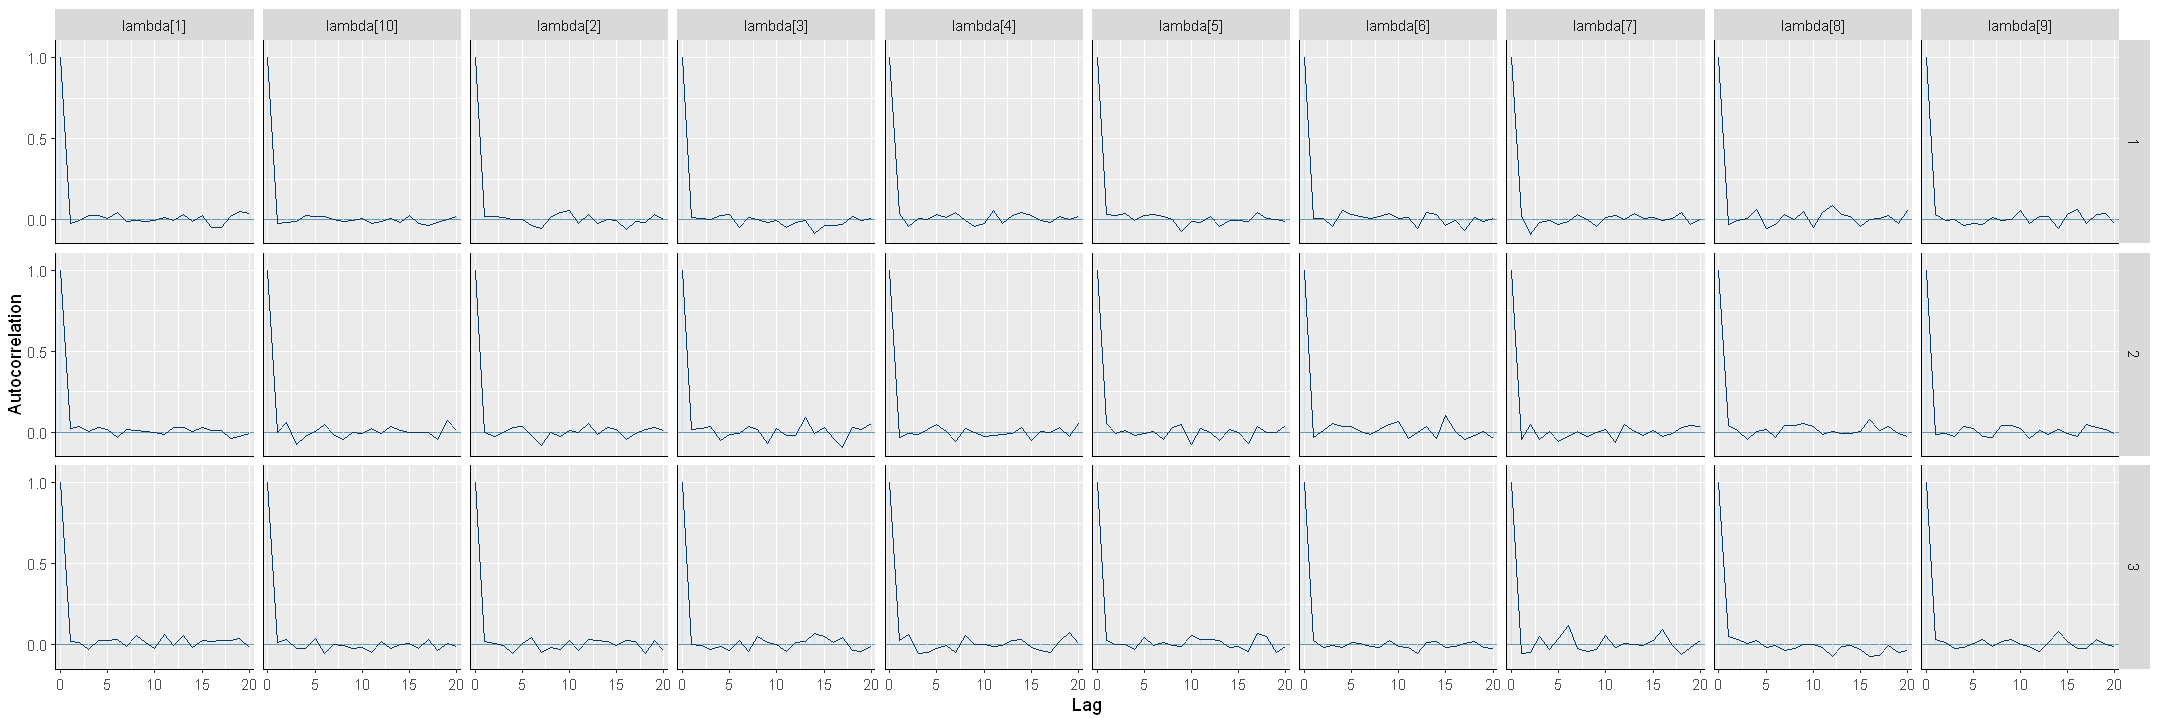

In [23]:
options(repr.plot.width=18,repr.plot.height=6)
mcmc_acf(pumps.JAGS.01.mcmc,pars=vars(contains("lambda")))

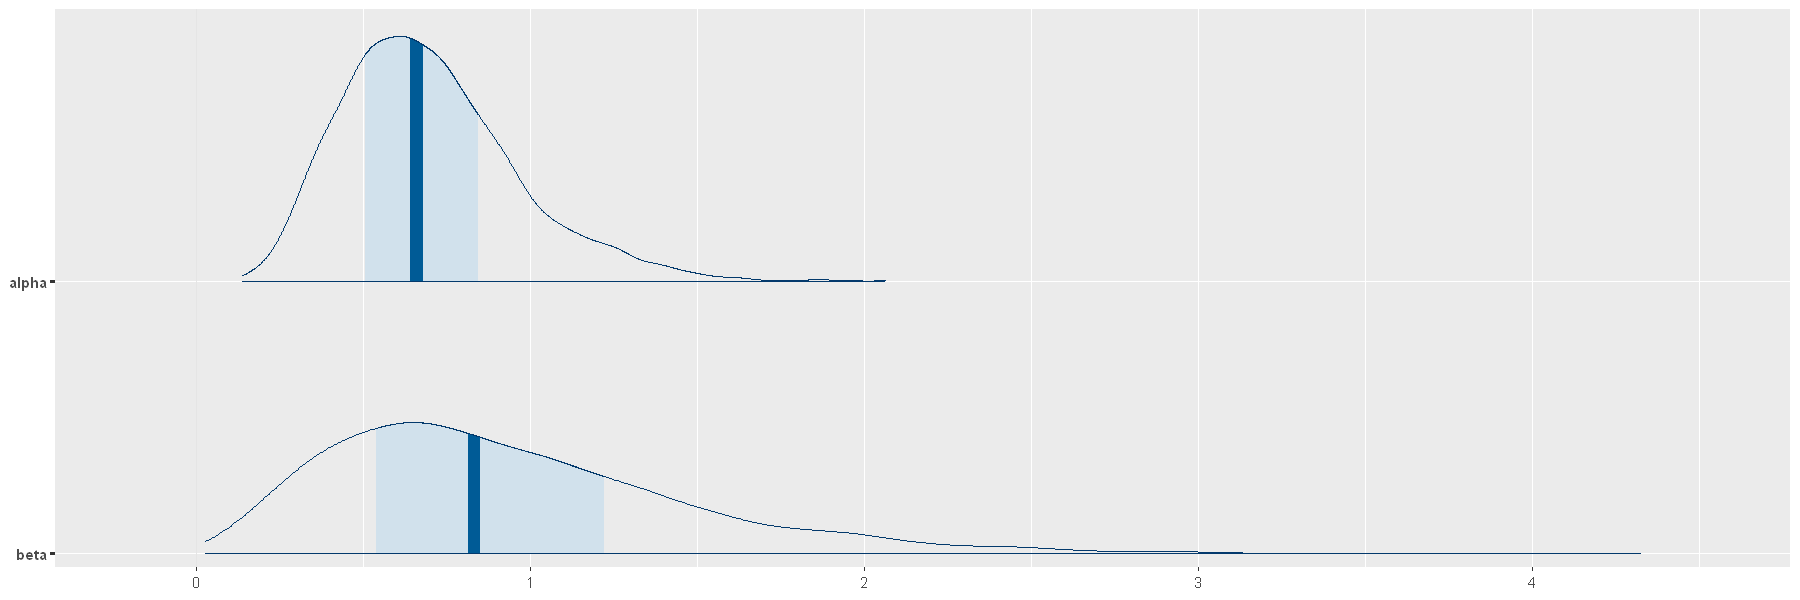

In [24]:
options(repr.plot.width=15,repr.plot.height=5)
mcmc_areas(pumps.JAGS.01.mcmc,pars=c("alpha","beta"))

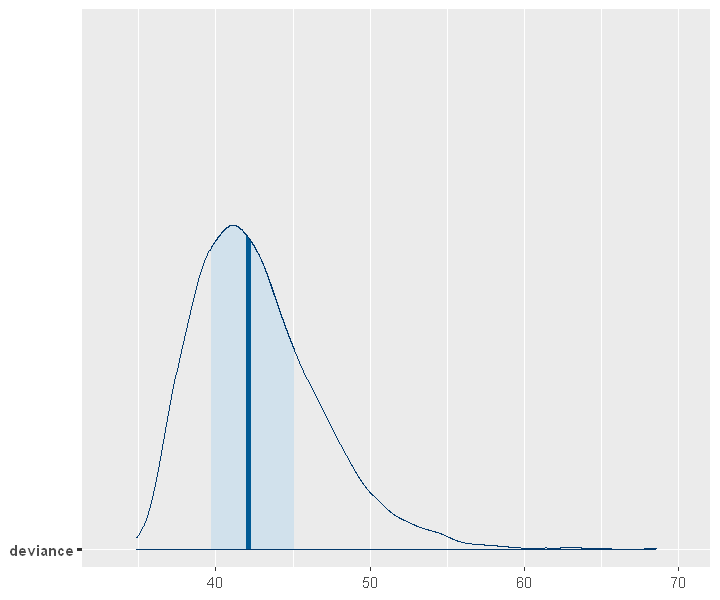

In [25]:
options(repr.plot.width=6,repr.plot.height=5)
mcmc_areas(pumps.JAGS.01.mcmc,pars=c("deviance"))

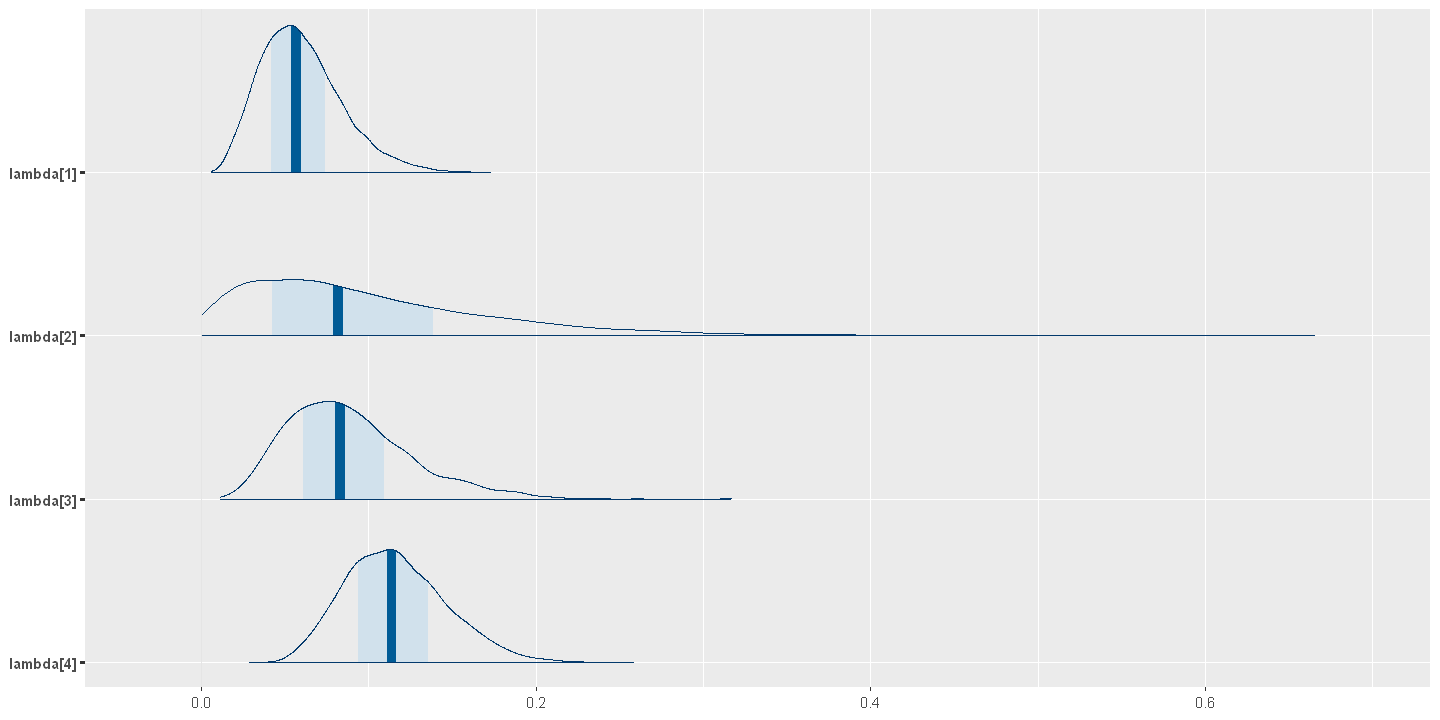

In [26]:
options(repr.plot.width=12,repr.plot.height=6)
mcmc_areas(pumps.JAGS.01.mcmc,pars=vars(param_range("lambda",c(1,2,3,4))))

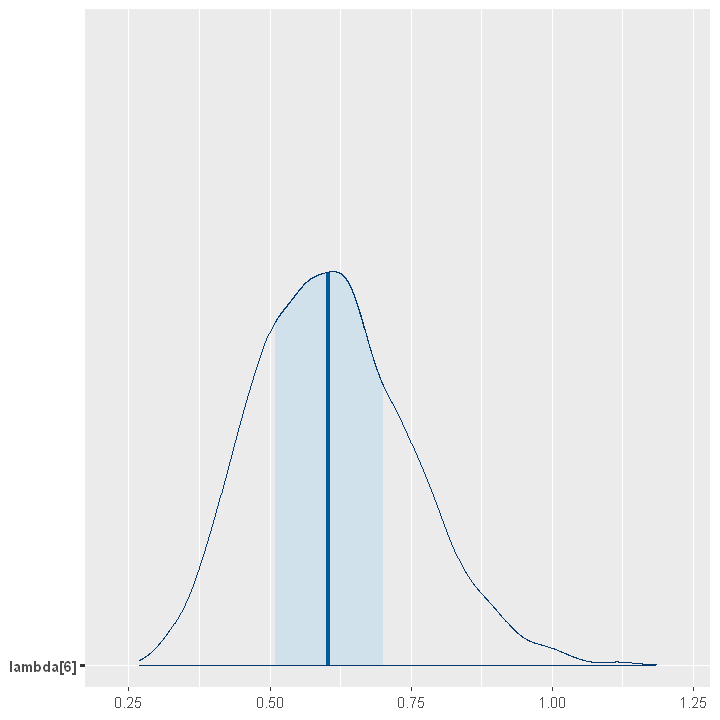

In [27]:
options(repr.plot.width=6,repr.plot.height=6)
mcmc_areas(pumps.JAGS.01.mcmc,pars=vars(param_range("lambda",c(6))))

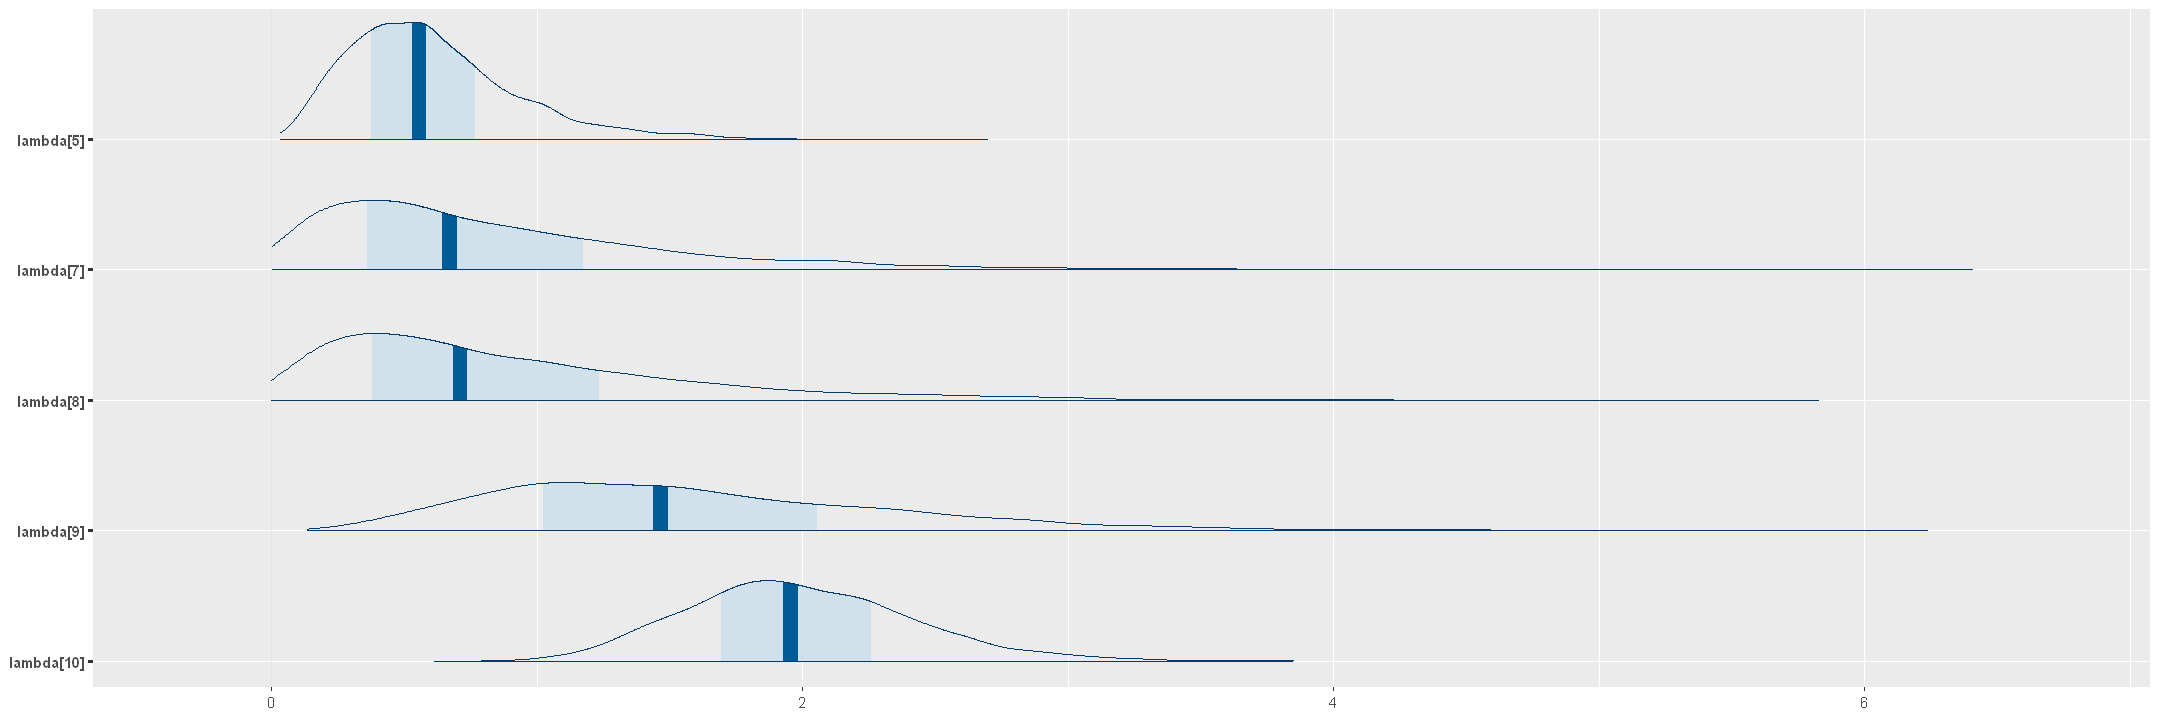

In [28]:
options(repr.plot.width=18,repr.plot.height=6)
mcmc_areas(pumps.JAGS.01.mcmc,pars=vars(param_range("lambda",c(5,7,8,9,10))))

In [29]:
pumps.JAGS.01.m<-as.matrix(pumps.JAGS.01.mcmc)
str(pumps.JAGS.01.m)

 num [1:3000, 1:13] 0.488 0.29 0.701 0.652 0.715 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:13] "alpha" "beta" "deviance" "lambda[1]" ...


In [30]:
# A function to compute the mode of a probability distribution from a sample,
# by obtaining a density estimation
MAP<-function(t){
    A<-density(t)
    return(A$x[which.max(A$y)])
}

In [31]:
pumps.JAGS.01.MAP<-apply(pumps.JAGS.01.m,2,MAP)
round(t(t(pumps.JAGS.01.MAP)),5)

alpha,0.60804
beta,0.65201
deviance,41.11399
lambda[1],0.05353
lambda[10],1.87276
lambda[2],0.05579
lambda[3],0.07625
lambda[4],0.11310
lambda[5],0.54115
lambda[6],0.61109
lambda[7],0.39226


In [32]:
pumps.JAGS.01.mean<-apply(pumps.JAGS.01.m,2,mean)
round(t(t(pumps.JAGS.01.mean)),4)

alpha,0.6967
beta,0.9301
deviance,42.7656
lambda[1],0.0597
lambda[10],1.9898
lambda[2],0.1006
lambda[3],0.0888
lambda[4],0.1163
lambda[5],0.6047
lambda[6],0.6119
lambda[7],0.8699


In [33]:
# Extract lambda[1:10] in its proper order
pumps.JAGS.01.MAP.lambdas<-pumps.JAGS.01.MAP[c(4,6:13,5)]
pumps.JAGS.01.mean.lambdas<-pumps.JAGS.01.mean[c(4,6:13,5)]

In [34]:
cbind("Empirical MAP"=Empirical.lambda.post.MAP,"Full Bayes MAP"=pumps.JAGS.01.MAP.lambdas)    

,Empirical MAP,Full Bayes MAP
lambda[1],0.05295461,0.05353397
lambda[2],0.06240447,0.05579360
lambda[3],0.07883604,0.07624639
lambda[4],0.11061706,0.11310071
lambda[5],0.45925276,0.54114644
lambda[6],0.57989296,0.61108723
lambda[7],0.42927614,0.39226356
lambda[8],0.42927614,0.39493824
lambda[9],1.14889822,1.10067392
lambda[10],1.85042855,1.87276217


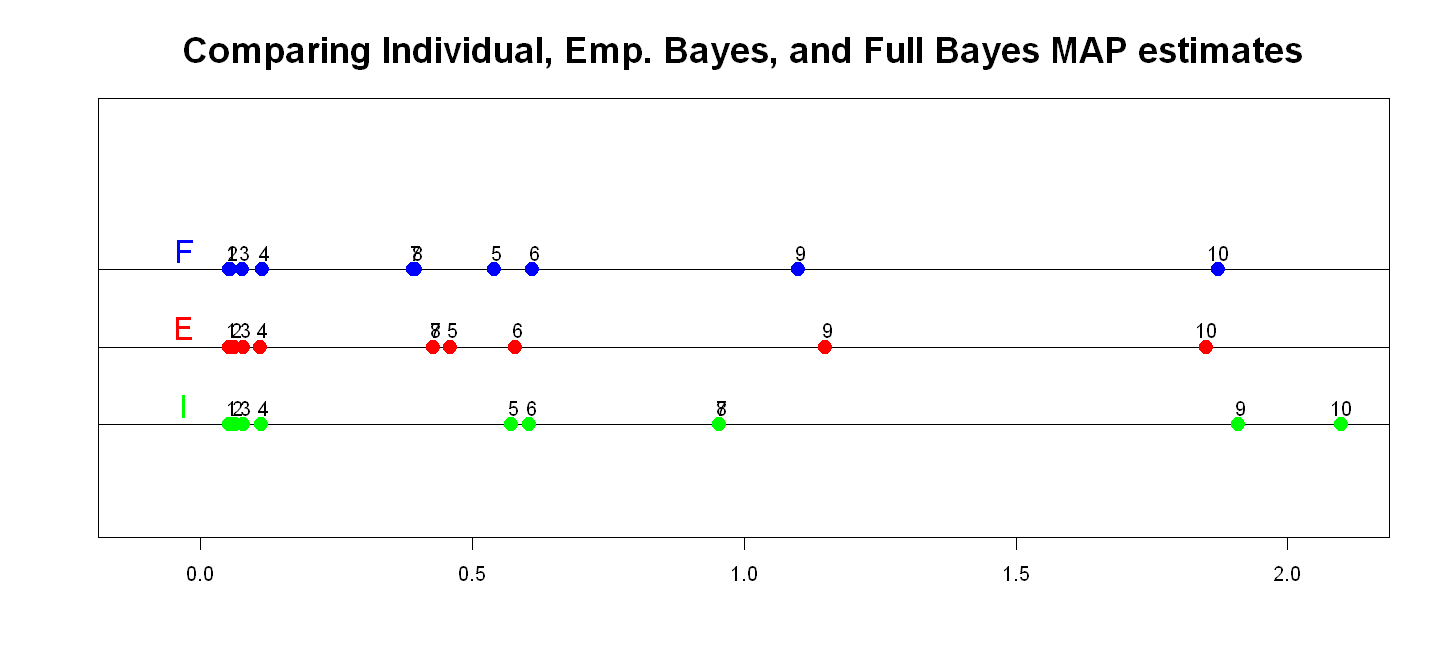

In [48]:
I<-Individual.lambda.ML
E<-Empirical.lambda.post.MAP
F<-pumps.JAGS.01.MAP.lambdas
m<-length(I)
x.min<-min(c(E,F,I),-0.1)
x.max<-max(c(E,F,I))
u<-sort(c(E,F))
z<-rep(0,length(u))
h0<-0.8
h1<-h0+0.8
h2<-h1+0.8
z0<-rep(h0,m)
z1<-rep(h1,m)
z2<-rep(h2,m)
options(repr.plot.width=12,repr.plot.height=5.5)
plot(u,z,"p",pch=19,col="white",xlim=c(-0.1,x.max),ylim=c(-0.2,4.0),cex=0.2,ylab="",xlab="",yaxt="n",
    main="Comparing Individual, Emp. Bayes, and Full Bayes MAP estimates",cex.main=1.8 )
abline(h=h0,lwd=0.5,col="black")
abline(h=h1,lwd=0.5,col="black")
abline(h=h2,lwd=0.5,col="black")
points(I,z0,pch=19,col="green",cex=1.6)
text(I,z0+0.18,sprintf("%2d",1:10),col="black",cex=1.0)
text(-0.03,h0+0.20,"I",col="green",cex=1.6)
points(E,z1,pch=19,col="red",cex=1.6)
text(E,z1+0.18,sprintf("%2d",1:10),col="black",cex=1.0)
text(-0.03,h1+0.20,"E",col="red",cex=1.6)
points(F,z2,pch=19,col="blue",cex=1.6)
text(F,z2+0.18,sprintf("%2d",1:10),col="black",cex=1.0)
text(-0.03,h2+0.20,"F",col="blue",cex=1.6)

In [34]:
round(cbind("Empirical mean"=Empirical.lambda.post.mean,"Full Bayes mean"=pumps.JAGS.01.mean.lambdas),5)

,Empirical mean,Full Bayes mean
lambda[1],0.06340,0.06006
lambda[2],0.12065,0.10028
lambda[3],0.09438,0.08939
lambda[4],0.11848,0.11617
lambda[5],0.60878,0.60730
lambda[6],0.61030,0.60869
lambda[7],0.82997,0.89269
lambda[8],0.82997,0.89659
lambda[9],1.43109,1.60870
lambda[10],1.93427,1.99733


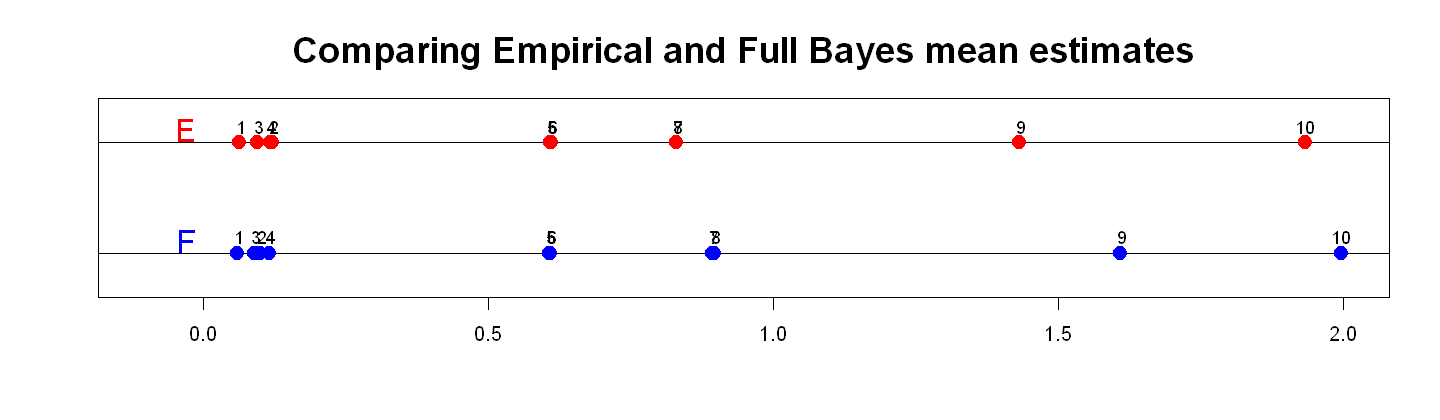

In [35]:
E<-Empirical.lambda.post.mean
F<-pumps.JAGS.01.mean.lambdas
x.min<-min(c(E,F))
x.max<-max(c(E,F))
u<-sort(c(E,F))
z<-rep(0,length(u))
h0<-0.3
h1<--h0
z0<-rep(h0,length(E))
z1<-rep(h1,length(F))
options(repr.plot.width=12,repr.plot.height=3.5)
plot(u,z,"p",pch=19,col="white",xlim=c(-0.1,x.max),ylim=c(-0.5,0.5),cex=0.2,ylab="",xlab="",yaxt="n",
    main="Comparing Empirical and Full Bayes mean estimates",cex.main=1.8 )
abline(h=h0,lwd=0.5,col="black")
abline(h=h1,lwd=0.5,col="black")
points(E,z0,pch=19,col="red",cex=1.6)
text(E,z0+0.09,sprintf("%2d",1:10),col="black",cex=0.9)
text(-0.03,h0+0.07,"E",col="red",cex=1.6)
points(F,z1,pch=19,col="blue",cex=1.6)
text(F,z1+0.09,sprintf("%2d",1:10),col="black",cex=0.9)
text(-0.03,h1+0.07,"F",col="blue",cex=1.6)

# Using Stan

In [36]:
#install.packages("ggplot2", repos= "https://cloud.r-project.org")
#install.packages("StanHeaders", repos= "https://cloud.r-project.org")
#install.packages("rstan", repos= "https://cloud.r-project.org")
require(rstan,quietly=TRUE)
options(mc.cores = parallel::detectCores())
rstan_options(auto_write = TRUE)
Sys.setenv(LOCAL_CPPFLAGS = '-march=native')


rstan version 2.26.13 (Stan version 2.26.1)


For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
For within-chain threading using `reduce_sum()` or `map_rect()` Stan functions,
change `threads_per_chain` option:
rstan_options(threads_per_chain = 1)


Do not specify '-march=native' in 'LOCAL_CPPFLAGS' or a Makevars file


Attaching package: 'rstan'


The following object is masked from 'package:R2jags':

    traceplot


The following object is masked from 'package:coda':

    traceplot




## Data 

In [37]:
x<-c(5, 1, 5, 14, 3, 19, 1, 1, 4, 22)
t<-c(94.320, 15.720, 62.880, 125.760, 5.240, 31.440, 1.048, 1.048, 2.096, 10.480)
n<-length(x)

In [38]:
pumps.dataList<-list(
    x = x,
    t = t,
    n = n 
    )

## Full Bayesian hierarchical treatment

The modeling is based on the assumption that the number of failures of the $i$-th pump follows a Poisson process with parameter $\lambda_{i}$, $(1\leq i\leq 10)$.

For an observation time $t_{i}$, the number of failures $X_{i}$ is thus a $\poissondist(\lambda_{i}\cdot t_{i})$ random variable.

Each $\lambda_{i}$ is considered as a sample from a common $\gammadist(\alpha,\beta)$.

In turn, $\beta$ is given a _hyperprior_ distribution $\gammadist(\gamma,\delta)$.

$\alpha$, $\gamma$ and $\delta$ take constant values to be decided.  

Robert, Casella (2010) use $\alpha=1.8$, $\gamma=0.1$ and $\delta=1.0$ or $\delta=100.0$

Thus we have a hierarchical model:

$$
    \begin{array}{clll}
    X_{i} &\sim&\poissondist(\lambda_{i}\cdot t_{i}),   \mskip50mu     &i=1,\dots,10,\\[0.35cm]
    \lambda_{i} &\sim&\gammadist(\alpha,\beta),              &i=1,\dots,10,\\[0.35cm]
    \beta &\sim&\gammadist(\gamma,\delta).
    \end{array}
$$

In the original paper where this data were first analyzed with a full Bayesian model:

Edward I. George, U. E. Makov and A. F. M. Smith (1993), _"Conjugate Likelihood Distributions"_   
Scandinavian Journal of Statistics, Vol. 20, No. 2 (1993), 147-156,

They use, instead, an exponential prior for $\alpha$:

$$
    \begin{array}{cll}
    \alpha &\sim&\operatorname{Exp}(\omega),
    \end{array}
$$

with parameter either $\omega=1.0$ or $\omega=1/100$. instead of a constant value.

### Specify model

In [39]:
pumps.modelString<-"
data {
  int<lower=0> n;
  int<lower=0> x[n];
  vector[n]  t;
}

parameters {
  real<lower=0> alpha;
  real<lower=0> beta;
  vector<lower=0>[n] lambda;
}

model {
  alpha ~ exponential(1.0);
  beta ~ gamma(0.1, 1.0);
  lambda ~ gamma(alpha, beta);
  x ~ poisson(lambda .* t);
}
" # close quote for modelString

Note the elementwise product in: `x ~ poisson(lambda .* t)`

### Translate model to C++ and compile to _Dynamic Shared Object (DSO)_

In [40]:
pumps.stanDso<-stan_model(model_code=pumps.modelString)

### Generate posterior sample

In [53]:
pumps.stanFit<-sampling(
        object=pumps.stanDso, 
        data = pumps.dataList, 
        chains = 4 ,
        iter = 5000 , 
        warmup = 1000 , 
        thin = 1
        )

In [54]:
S<-summary(pumps.stanFit)
round(S$summary,3)

,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat
alpha,0.697,0.003,0.274,0.288,0.501,0.655,0.847,1.338,10835.297,1
beta,0.930,0.005,0.549,0.186,0.533,0.826,1.208,2.297,10326.718,1
lambda[1],0.060,0.000,0.025,0.021,0.042,0.057,0.075,0.118,20779.346,1
lambda[2],0.101,0.001,0.080,0.008,0.043,0.082,0.137,0.306,21661.990,1
lambda[3],0.089,0.000,0.038,0.031,0.061,0.084,0.111,0.177,22446.510,1
lambda[4],0.116,0.000,0.030,0.065,0.094,0.113,0.135,0.182,21283.059,1
lambda[5],0.600,0.002,0.312,0.149,0.371,0.548,0.769,1.340,23054.610,1
lambda[6],0.608,0.001,0.139,0.369,0.510,0.597,0.696,0.907,20458.922,1
lambda[7],0.893,0.005,0.733,0.074,0.369,0.698,1.209,2.800,22326.440,1
lambda[8],0.890,0.005,0.743,0.071,0.362,0.692,1.195,2.834,22272.707,1


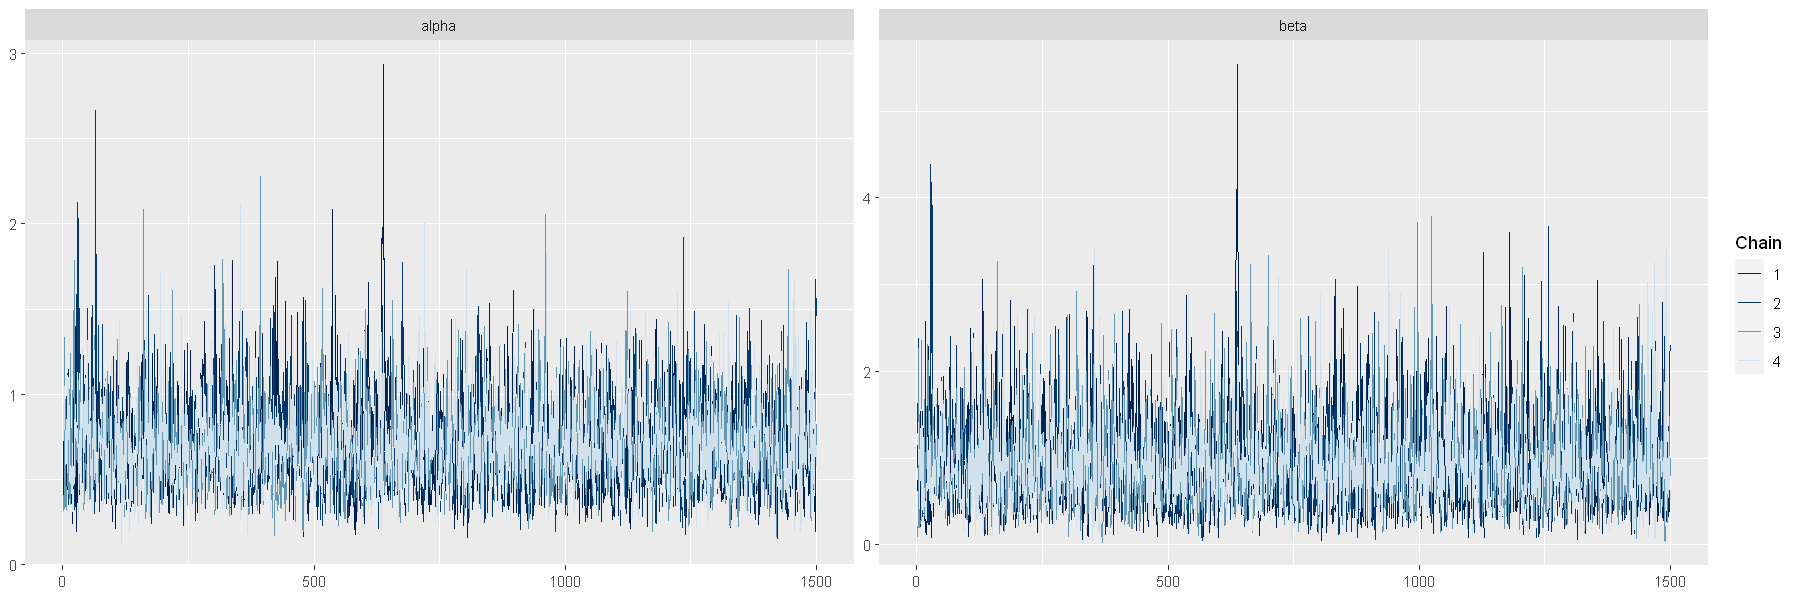

In [43]:
options(repr.plot.width=15,repr.plot.height=5)
mcmc_trace(pumps.stanFit,pars=c("alpha","beta"))

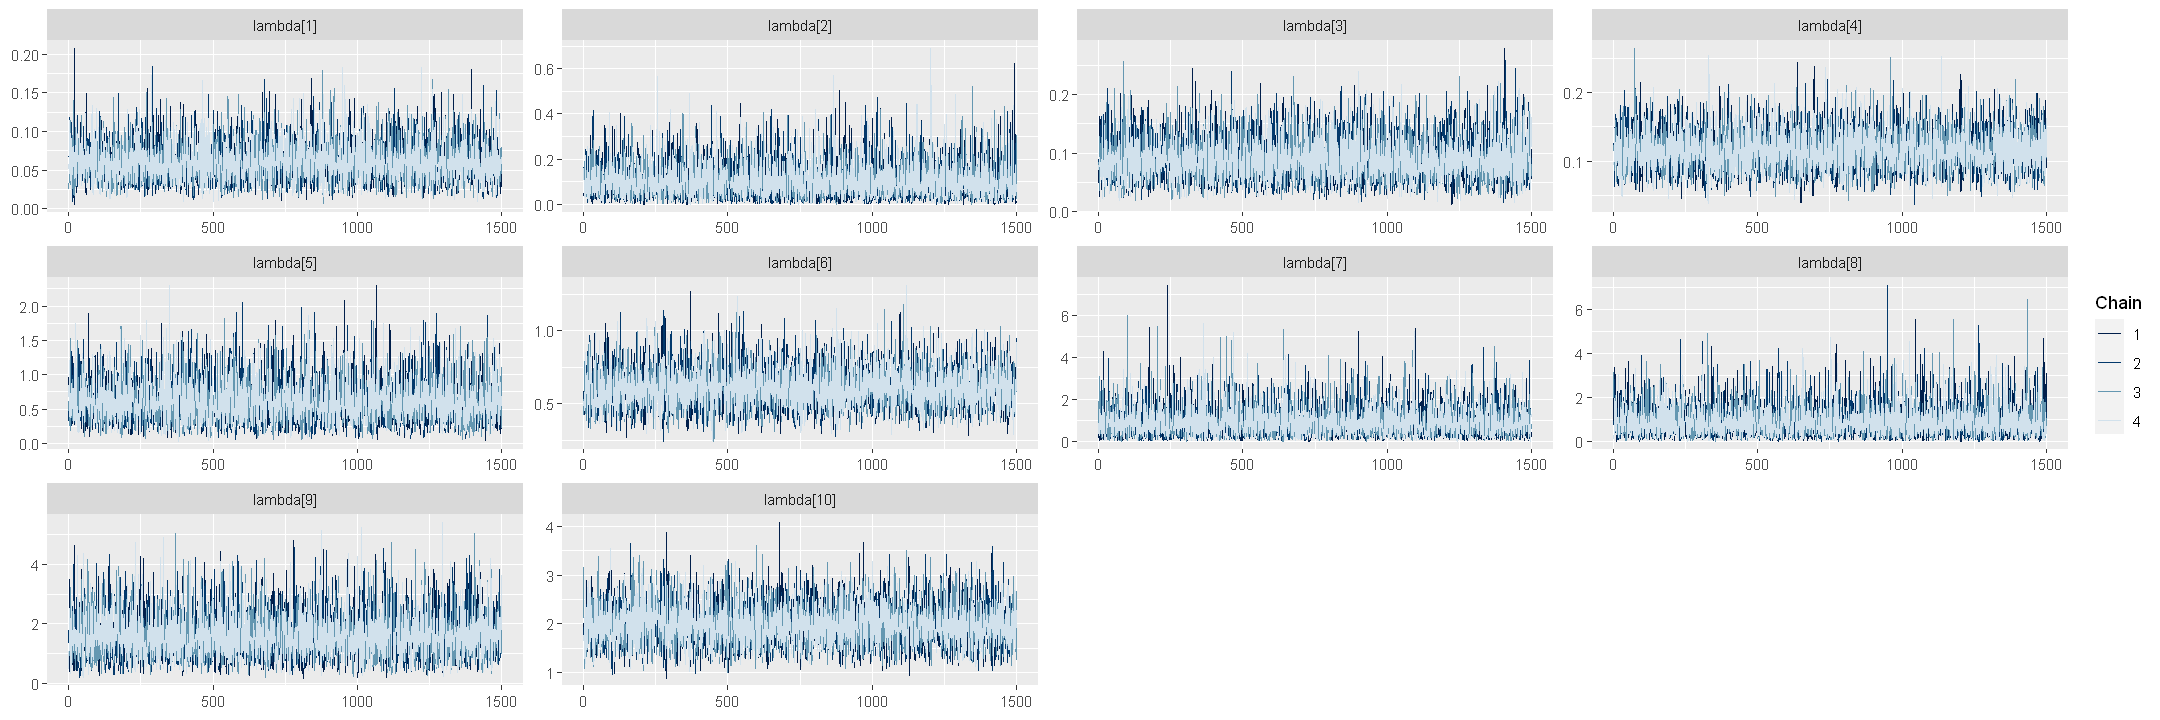

In [44]:
options(repr.plot.width=18,repr.plot.height=6)
mcmc_trace(pumps.stanFit,pars=vars(contains("lambda")))

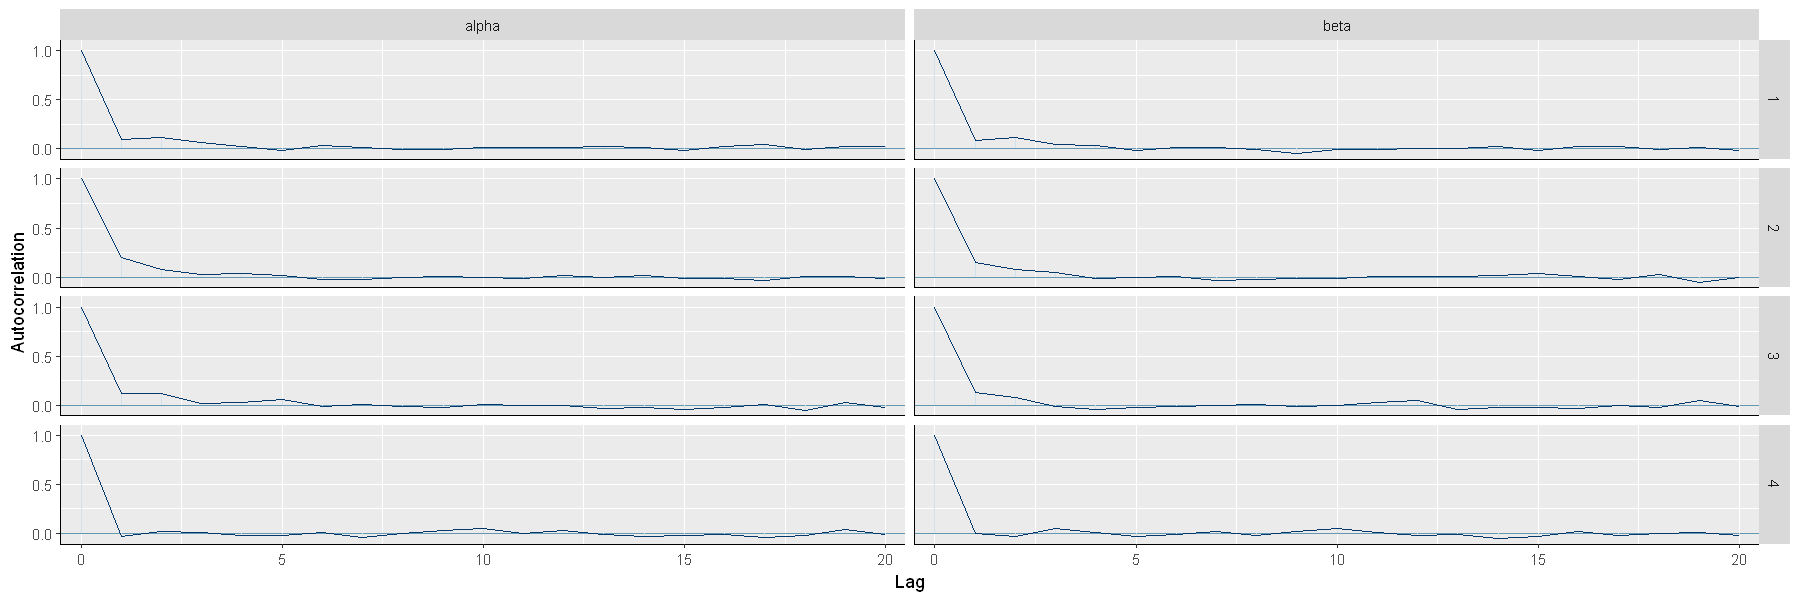

In [45]:
options(repr.plot.width=15,repr.plot.height=5)
mcmc_acf(pumps.stanFit,pars=c("alpha","beta"))

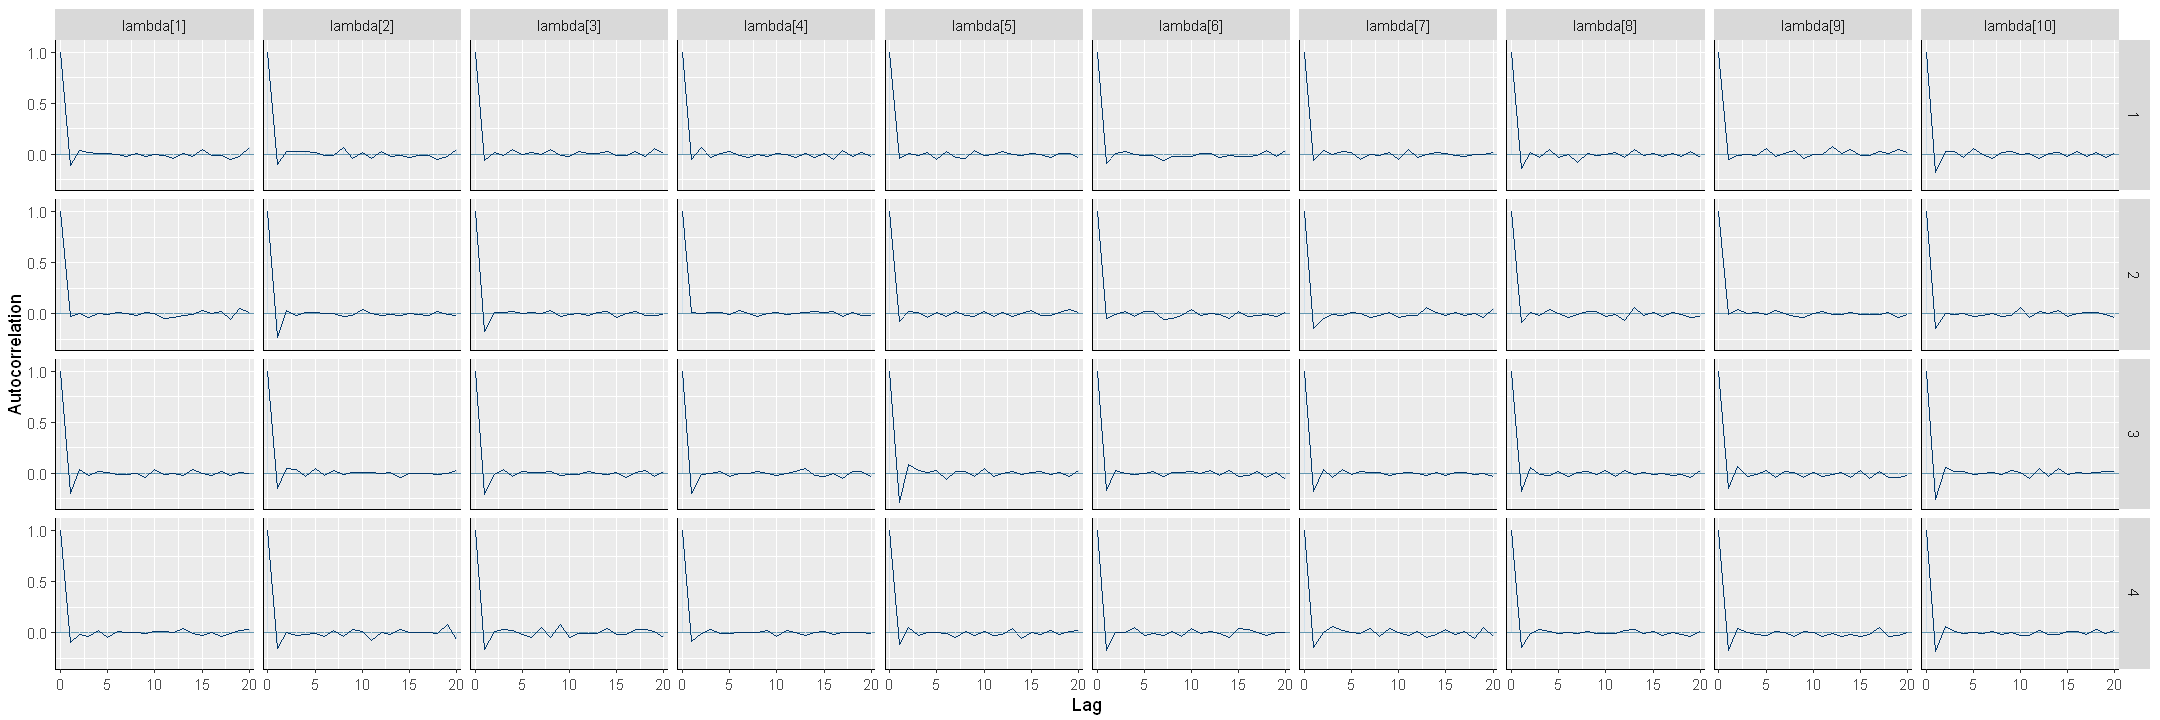

In [46]:
options(repr.plot.width=18,repr.plot.height=6)
mcmc_acf(pumps.stanFit,pars=vars(contains("lambda")))

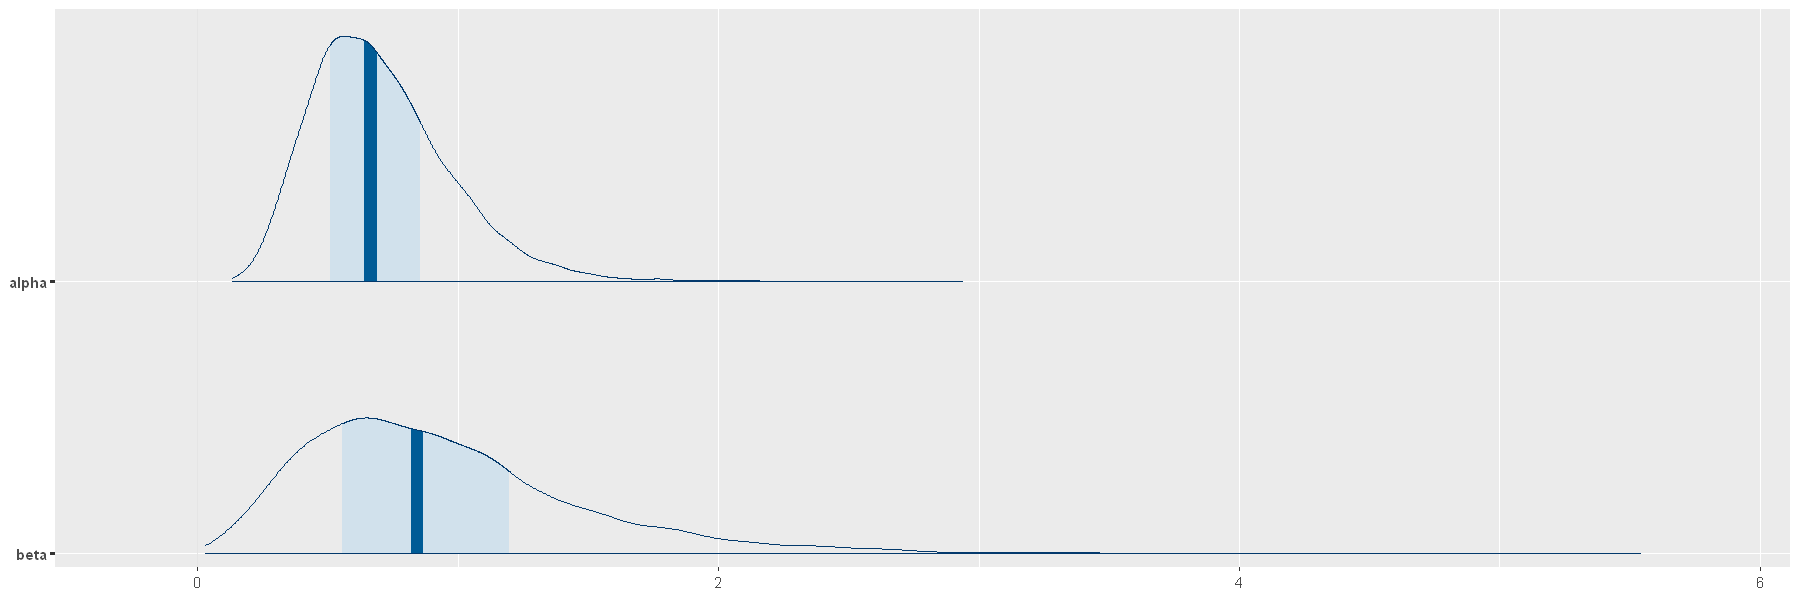

In [47]:
options(repr.plot.width=15,repr.plot.height=5)
mcmc_areas(pumps.stanFit,pars=c("alpha","beta"))

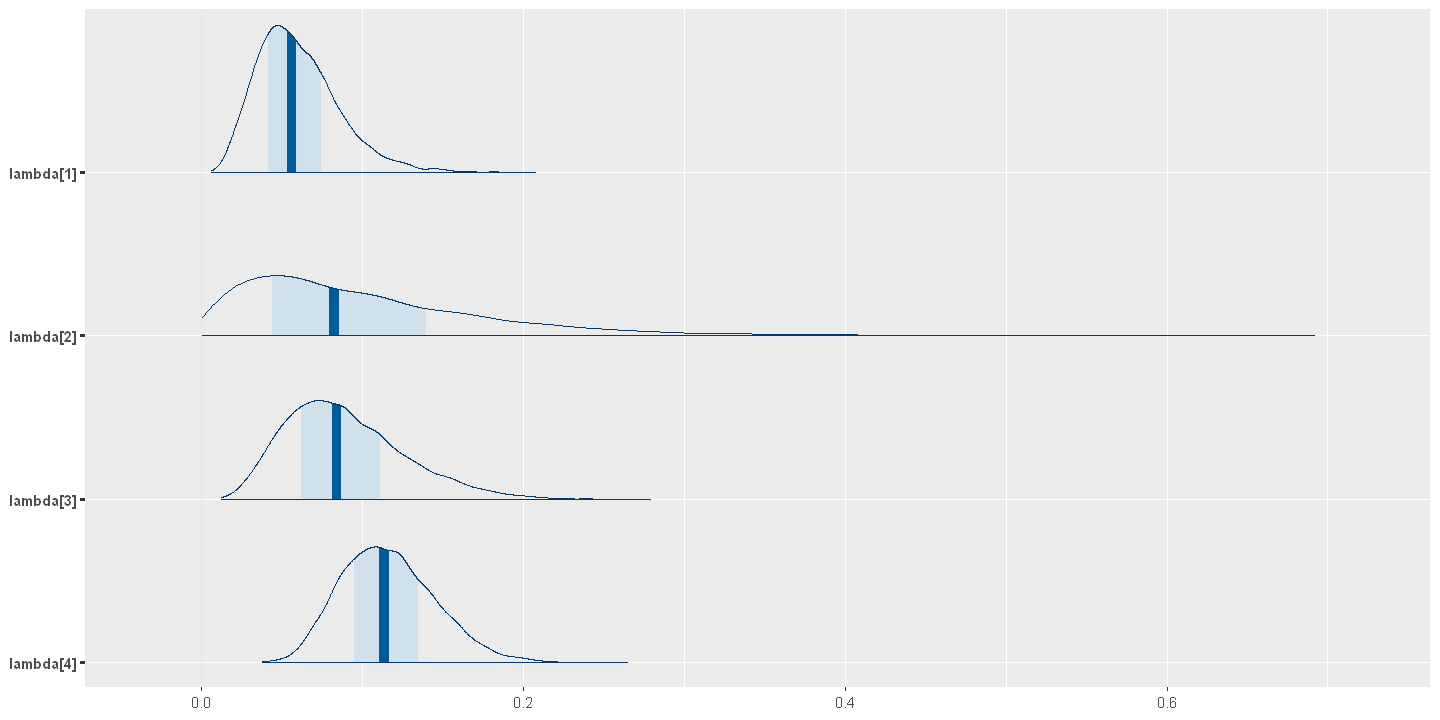

In [48]:
options(repr.plot.width=12,repr.plot.height=6)
mcmc_areas(pumps.stanFit,pars=vars(param_range("lambda",c(1,2,3,4))))

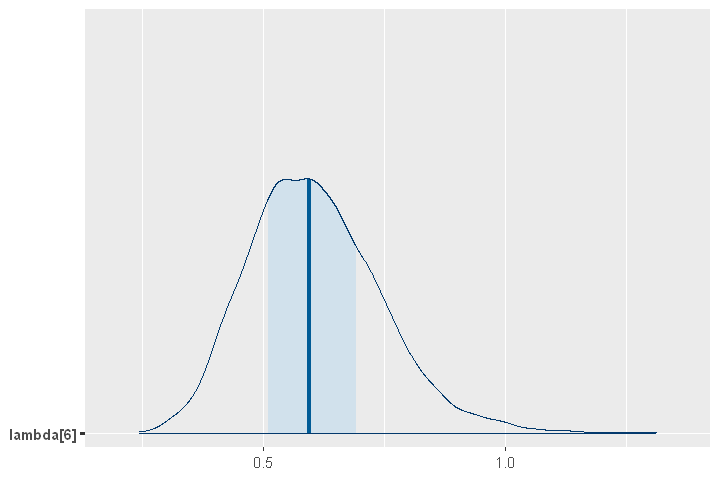

In [49]:
options(repr.plot.width=6,repr.plot.height=4)
mcmc_areas(pumps.stanFit,pars=vars(param_range("lambda",c(6))))

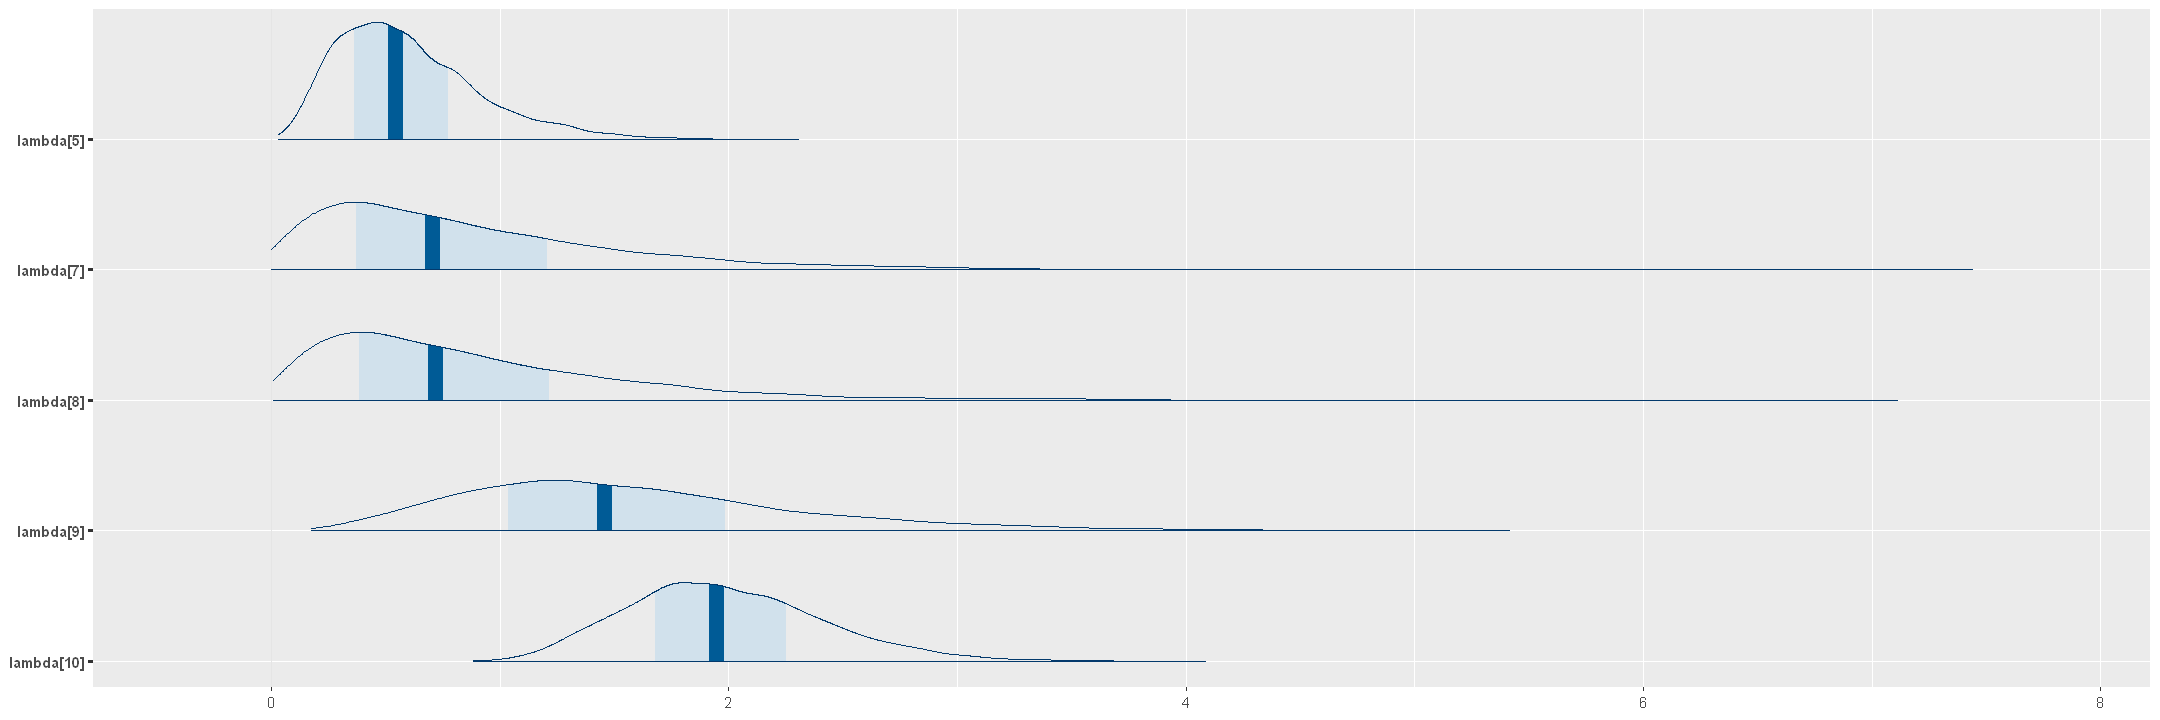

In [50]:
options(repr.plot.width=18,repr.plot.height=6)
mcmc_areas(pumps.stanFit,pars=vars(param_range("lambda",c(5,7,8,9,10))))